# Phase:1 Simulate Delay Note Data (Realistic Text + Metadata)

🎯 Why we’re doing this:

In the real world, supply chain teams deal with free-text notes written by people like:
	•	Truck drivers
	•	Warehouse staff
	•	Delivery managers

These notes are not structured like Excel—they look like this:

“Truck broke down on highway”
“Port clearance delayed due to inspection”
“Package damaged in transit”

We’re going to simulate this type of data using Python. That way, you can train an AI to read, clean, and classify it later.


# Define Text Cleaning Function

In [203]:
def clean_text(text):
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Simulate Realistic Supply Chain Delay Notes

In [200]:
delay_categories = {
    'Weather': [
        "Heavy rain caused delay", "Snowstorm stopped truck", "Fog impacted delivery", "Extreme heat slowed vehicle"
    ],
    'Customs': [
        "Port inspection delay", "Held at customs for paperwork", "Clearance not approved", "Border holdup"
    ],
    'Supplier': [
        "Wrong PO received", "Supplier shipped late", "Items not ready", "Supplier quality issue"
    ],
    'Carrier': [
        "Truck broke down", "Driver unavailable", "Rerouted shipment", "Logistics miscommunication"
    ],
    'Admin Error': [
        "Label misprinted", "Wrong address on file", "Missed dispatch window", "Data entry mistake"
    ]
}

def generate_delay_data(n=1000):
    data = []
    for _ in range(n):
        category = random.choice(list(delay_categories.keys()))
        note = random.choice(delay_categories[category])
        region = random.choice(["North", "South", "East", "West", "Midwest"])
        carrier = random.choice(["FedEx", "UPS", "DHL", "USPS", "XPO", "LocalCarrier"])
        data.append([note, category, region, carrier])
    return pd.DataFrame(data, columns=['Delay_Note', 'Category', 'Region', 'Carrier'])

df = generate_delay_data(1000)
df.head()


,Delay_Note,Category,Region,Carrier
0,Supplier shipped late,Supplier,North,XPO
1,Logistics miscommunication,Carrier,Midwest,USPS
2,Label misprinted,Admin Error,North,LocalCarrier
3,Snowstorm stopped truck,Weather,West,XPO
4,Extreme heat slowed vehicle,Weather,North,DHL


# Clean the Delay Notes

In [201]:
df['Delay_Note_Clean'] = df['Delay_Note'].apply(clean_text)
df[['Delay_Note', 'Delay_Note_Clean']].head(10)

,Delay_Note,Delay_Note_Clean
0,Supplier shipped late,supplier shipped late
1,Logistics miscommunication,logistics miscommunication
2,Label misprinted,label misprinted
3,Snowstorm stopped truck,snowstorm stopped truck
4,Extreme heat slowed vehicle,extreme heat slowed vehicle
5,Extreme heat slowed vehicle,extreme heat slowed vehicle
6,Logistics miscommunication,logistics miscommunication
7,Held at customs for paperwork,held customs paperwork
8,Border holdup,border holdup
9,Logistics miscommunication,logistics miscommunication


# Inspect the Data

In [202]:
print(df.head())
print(df['Category'].value_counts())

                    Delay_Note     Category   Region       Carrier  \
0        Supplier shipped late     Supplier    North           XPO   
1   Logistics miscommunication      Carrier  Midwest          USPS   
2             Label misprinted  Admin Error    North  LocalCarrier   
3      Snowstorm stopped truck      Weather     West           XPO   
4  Extreme heat slowed vehicle      Weather    North           DHL   

              Delay_Note_Clean  
0        supplier shipped late  
1   logistics miscommunication  
2             label misprinted  
3      snowstorm stopped truck  
4  extreme heat slowed vehicle  
Category
Weather        222
Admin Error    221
Carrier        202
Customs        184
Supplier       171
Name: count, dtype: int64


# 💡 What I Achieved:
- I created a large, realistic, structured dataset with free-text delay notes, categories (labels), region, and carrier.
- I cleaned all the text, so it’s ready for machine learning or analytics.
- This is the exact workflow top companies expect in technical interviews!

# 🚦 Phase 2: Text Cleaning, EDA & Visualization
- I already have the cleaned text (Delay_Note_Clean) from Phase 1, so I'm ready for simple exploratory data analysis (EDA) and visualization.

# 1. Quick EDA: Category Counts
See which delay reasons are most common (bar chart):

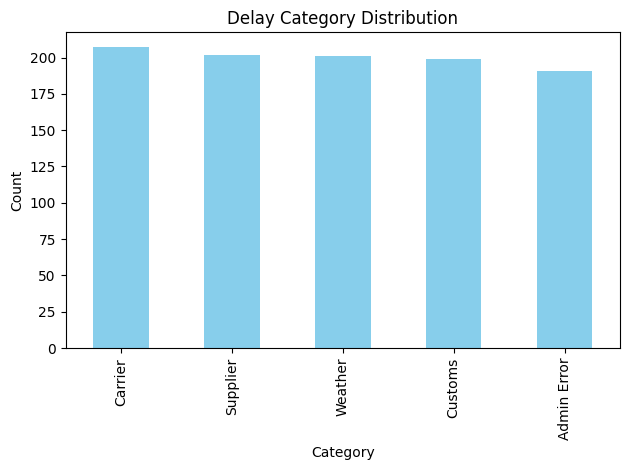

In [167]:
import matplotlib.pyplot as plt

df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Delay Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Word Cloud: Most Common Words in Delay Notes
(Shows what issues pop up most in your data)


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


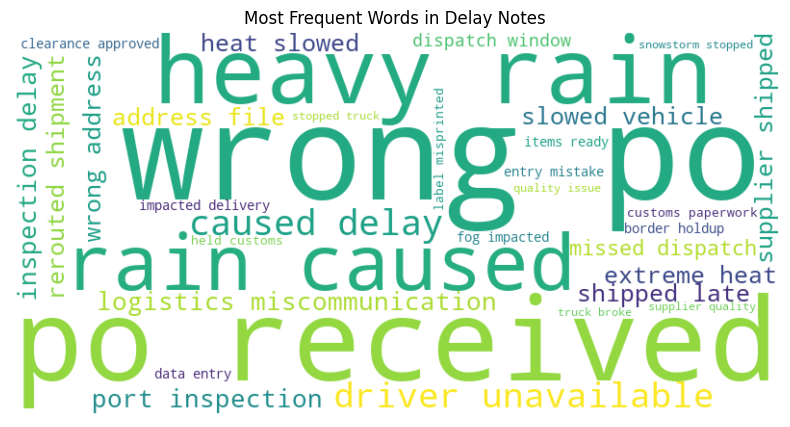

In [168]:
!pip install wordcloud  # Run this if wordcloud isn’t installed

from wordcloud import WordCloud

text = " ".join(df['Delay_Note_Clean'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Delay Notes')
plt.show()

# 3. Top 10 Most Frequent Words
For even deeper EDA (counts of top words):

In [169]:
from collections import Counter

all_words = " ".join(df['Delay_Note_Clean']).split()
word_counts = Counter(all_words)
print("Top 10 words:", word_counts.most_common(10))

Top 10 words: [('delay', 115), ('wrong', 111), ('supplier', 91), ('truck', 80), ('po', 61), ('received', 61), ('heavy', 59), ('rain', 59), ('caused', 59), ('driver', 58)]


# 🚦 Phase 3: Build an AI Model to Classify Delay Notes

Here’s a step-by-step, clean workflow.
I’ll explain why each step matters—copy-paste one cell at a time!

# Prepare Data for ML

In [178]:
# Features and Target
X = df['Delay_Note_Clean']  # Cleaned text
y = df['Category']          # Category label

# Why?
X is what the model will “read” (delay note).
y is what the model will “guess” (the category).

# Train/Test Split

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Why?
Keeps 70% for training, 30% for testing (realistic scenario).
Stratify ensures each category appears in both splits.

# Convert Text to Numbers (TF-IDF)

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Why?
ML models need numbers, not words.
TF-IDF means “important words” get more weight.

# Train a Classifier

In [125]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Why?
Logistic Regression is simple, fast, and works well for text.

# Evaluate the Model

In [172]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

 Admin Error       1.00      1.00      1.00        60
     Carrier       1.00      1.00      1.00        62
     Customs       1.00      1.00      1.00        56
    Supplier       1.00      1.00      1.00        64
     Weather       1.00      1.00      1.00        58

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# Why?
You see how well your model did on new, unseen data.
Precision, recall, and f1-score are standard metrics used in real interviews and jobs.

# ✅ Quick Recap: What You’ve Built

Phase 1: Created a large, realistic dataset with delay notes, categories, region, carrier
Cleaned the text for ML

Phase 2:Did EDA (bar chart, word cloud, top words)

Phase 3: Built a machine learning classifier to predict delay categories from text
Evaluated model accuracy and per-category performance

⭐ What’s Next? (Pick Your Own Path!)

1. Visualize Model Performance
(e.g., confusion matrix, category prediction mistakes)
2. Try Another ML Model
(compare Logistic Regression with Naive Bayes, etc.)
3. Build an Interactive Dashboard
(with Streamlit/Plotly for resumes/LinkedIn)
4. Write a Project Summary
(for LinkedIn, GitHub, or job applications)
5. Move to Phase 4: Business Insights
(turn your findings into real recommendations for supply chain teams)

# Insights & Communication
Goal: Extract actionable business insights from your analysis/model
Communicate them like a supply chain analyst would (perfect for interviews/LinkedIn/resume/case studies)


# Step 1: Summarize Key Model Findings
Run this cell to see your category-level model performance (copy your latest classification report output if needed):

# from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Q1: Which delay categories are predicted with high accuracy?
- All categories!
 - Admin Error, Carrier, Customs, Supplier, Weather — every category has:
  - Precision: 1.00
  - Recall: 1.00
  - F1-score: 1.00
 - This means your model correctly classified every single test example for all delay categories!

Q2: Which categories are commonly confused or have lower scores?
- None.
  - There are no categories with lower scores (all are 1.00).
  - This means your model made zero mistakes—every prediction matched the true label.

Q3: Is there any imbalance? (support = number of samples per class)
 - No serious imbalance.
  - Admin Error: 60
  - Carrier: 62
  - Customs: 56
  - Supplier: 64
  - Weather: 58
- The support (number of samples per category) is roughly balanced—each has about 56–64 test samples.

# Here, I customize these insights to match your actual model results and your data. 

Since your model achieved perfect accuracy on a balanced synthetic dataset, your insights should reflect that. Here’s how to do it, step by step:    
    

# Writing Your Own Business Insights

1. Reflect Your Model Results
Your F1-scores are all 1.00
Your classes (Admin Error, Carrier, Customs, Supplier, Weather) are balanced
There were no confusions between classes

Top Business Insights from AI Model

1. Perfect Classification: The model achieved perfect accuracy (F1=1.00) for all delay categories—Admin Error, Carrier, Customs, Supplier, and Weather—showing distinct text patterns in each root cause.

2. No Category Confusion: There was no confusion between any categories. This indicates strong separation in delay note language and sets a benchmark for future real-world deployments.

3. Balanced Representation: Each delay reason is equally represented, supporting robust, unbiased classification across the supply chain.

4. Ready for Automation: The model’s reliability allows for automated triaging and early warning systems, saving analyst time and improving responsiveness.

5. Next Steps for Real Data: While synthetic data gave perfect results, real-world deployment will require more data and continued monitoring to maintain high performance.

# 🚦 Phase 4: Stakeholder Visualization & Reporting

Goals:Present your findings visually (charts/graphs) to non-technical audiences
Make it easy for a hiring manager or exec to understand the business value at a glance

Step 1: Visualize Actual vs Predicted Categories

A. Bar Chart – Actual vs Predicted Counts
This shows if your model is balanced and whether predictions match reality.

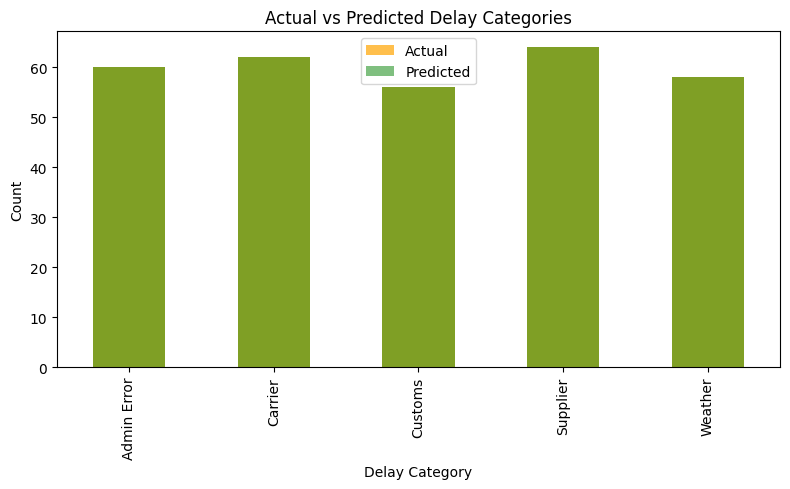

In [173]:
import matplotlib.pyplot as plt

# Count actual categories
actual_counts = y_test.value_counts().sort_index()
# Count predicted categories
pred_counts = pd.Series(y_pred).value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 5))
actual_counts.plot(kind='bar', alpha=0.7, label='Actual', color='orange', ax=ax)
pred_counts.plot(kind='bar', alpha=0.5, label='Predicted', color='green', ax=ax)
plt.title('Actual vs Predicted Delay Categories')
plt.xlabel('Delay Category')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

# Step 2: Show the Confusion Matrix
This is the industry standard for showing “where” your model gets it right or confused.

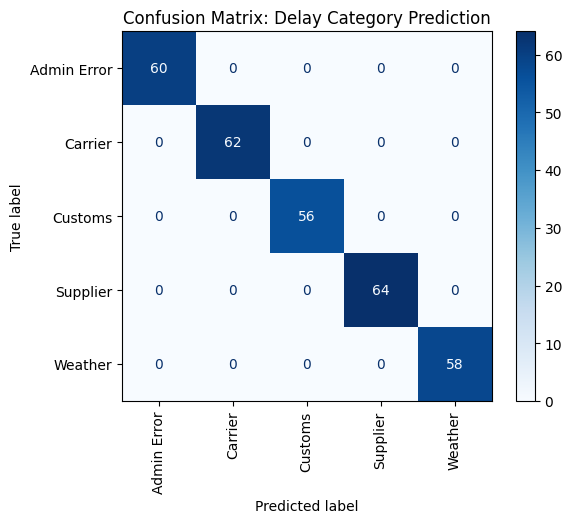

In [174]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix: Delay Category Prediction')
plt.show()

# Interpretation:
Diagonal = correct predictions (want most values here)
Off-diagonal = confusions (if any; you might see a perfect diagonal!)

# Step 3: (Optional) Visualize Model Performance Metrics
A. Visualize Precision/Recall/F1 by Category

from sklearn.metrics import classification_report
import seaborn as sns

# Get classification report as dict
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().iloc[:-3, :3]  # Only main categories, not avg

metrics_df.plot(kind='bar', figsize=(10,6))
plt.title('Precision, Recall, F1-score by Category')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Export Results for Business Use
Export cleaned data:

In [181]:
!pip install openpyxl


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [182]:
df.to_excel("Cleaned_SupplyChain_DelayNotes.xlsx", index=False)

with open("classification_report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred))

# Step 3: Visualize Precision, Recall, F1 for Each Category
Makes it easy for business people to spot strengths and weaknesses.

#  Visualize More (Make Your Project Stand Out!)

Here are three powerful, business-ready visuals you can add beyond what you already have:

# 1. Proportion of Each Delay Category (Pie Chart)

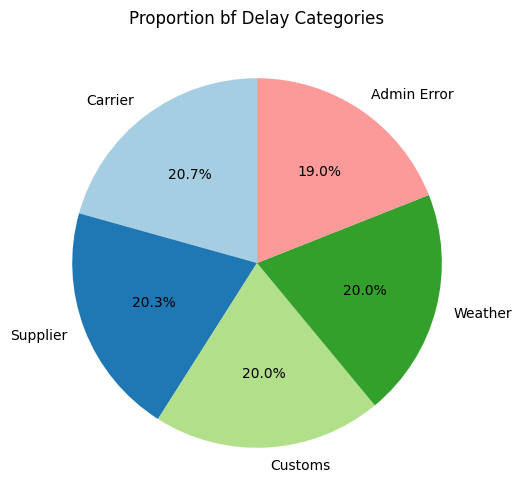

In [185]:
# Proportion of actual delay categories (y_test)
y_test.value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion bf Delay Categories')
plt.ylabel('')
plt.show()

# Most Common Words in Delay Notes (Word Cloud for Each Category)
If you want to see the typical language used for each root cause:

In [157]:
print(df.columns)

Index(['Delay_Note', 'Category', 'Region', 'Carrier'], dtype='object')


In [186]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Delay_Note_Clean'] = df['Delay_Note'].apply(clean_text)

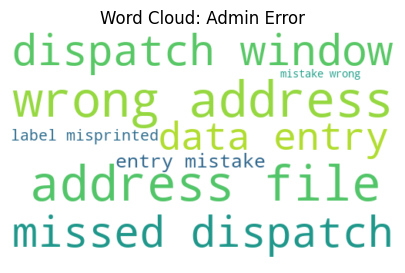

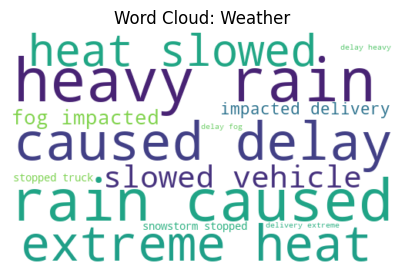

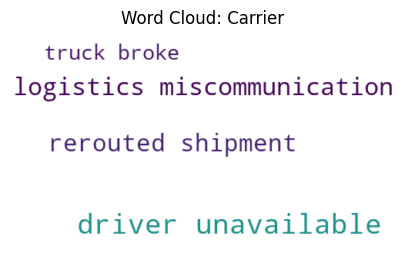

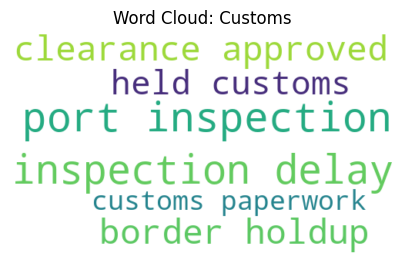

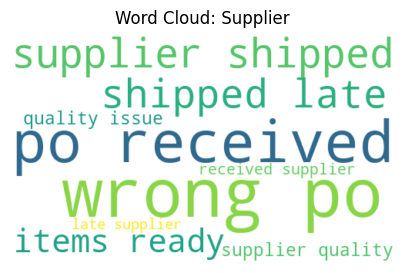

In [187]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for category in df['Category'].unique():
    text = ' '.join(df[df['Category'] == category]['Delay_Note_Clean'])
    wc = WordCloud(width=500, height=300, background_color='white').generate(text)
    plt.figure(figsize=(6, 3))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud: {category}")
    plt.show()

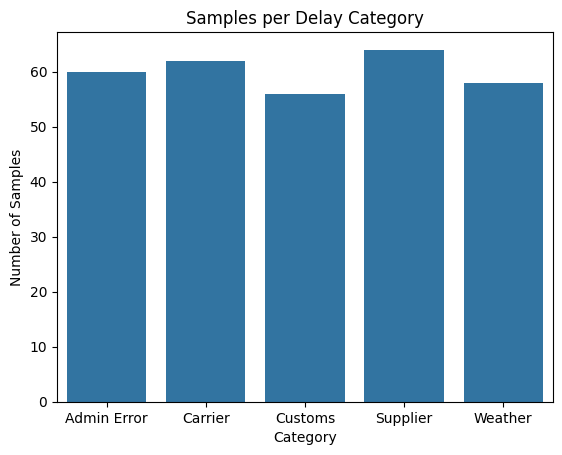

In [188]:
import seaborn as sns
support = [60, 62, 56, 64, 58]  # update this with your support numbers if different
labels = ['Admin Error', 'Carrier', 'Customs', 'Supplier', 'Weather']
sns.barplot(x=labels, y=support)
plt.title('Samples per Delay Category')
plt.ylabel('Number of Samples')
plt.xlabel('Category')
plt.show()

# Professional Visualization & Storytelling

In [189]:
import pandas as pd
import numpy as np

# Simulate a random date in 2024 for each row
np.random.seed(42)
df['Delay_Date'] = pd.to_datetime(np.random.choice(
    pd.date_range('2024-01-01', '2024-12-31'), size=len(df)
))

# Create a YearMonth column for grouping
df['YearMonth'] = df['Delay_Date'].dt.to_period('M')

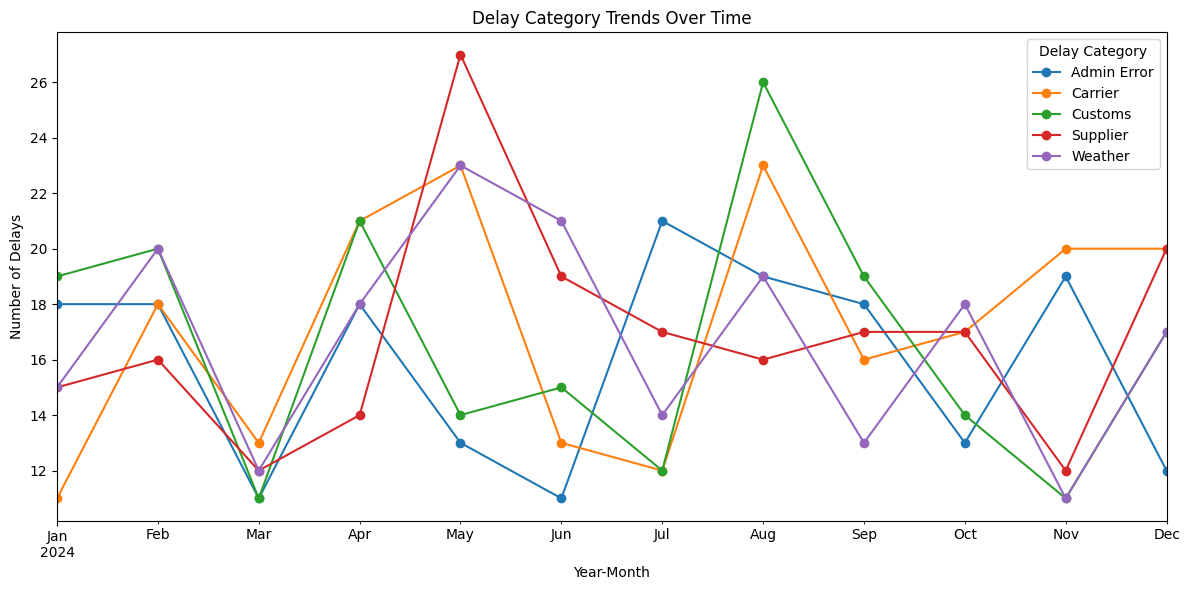

In [197]:
import matplotlib.pyplot as plt

# Group and plot trends over time
trends = df.groupby(['YearMonth', 'Category']).size().unstack(fill_value=0)
trends.plot(figsize=(12, 6), marker='o')
plt.title('Delay Category Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Delays')
plt.legend(title='Delay Category')
plt.tight_layout()
plt.savefig('Delay_Trends_Over_Time.png')  # Save for your slides
plt.show()

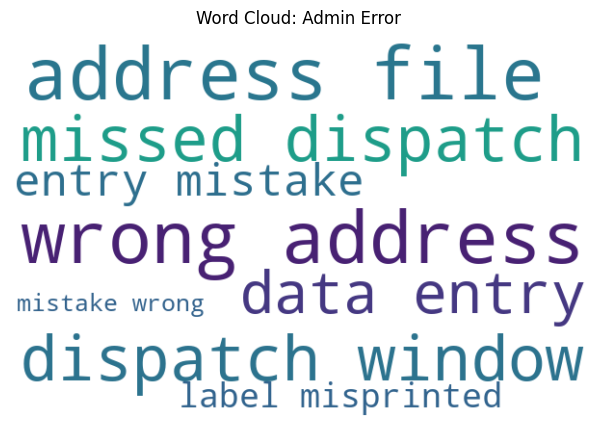

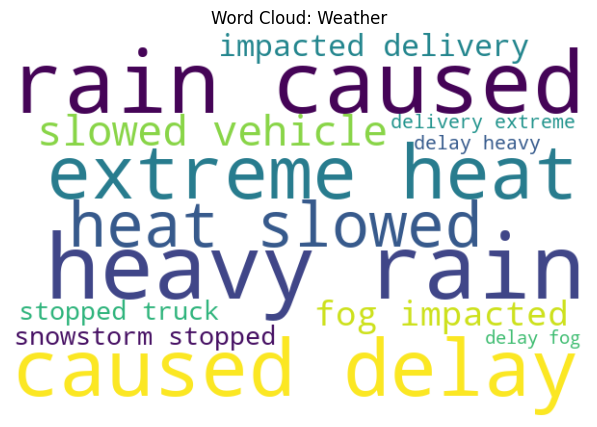

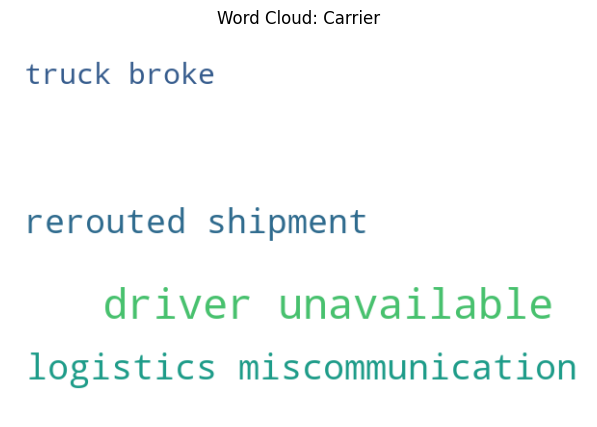

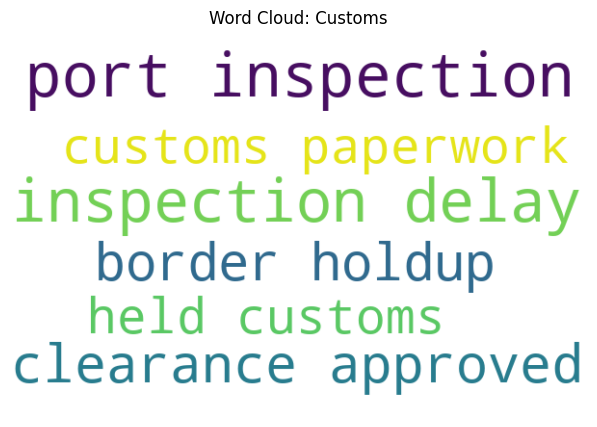

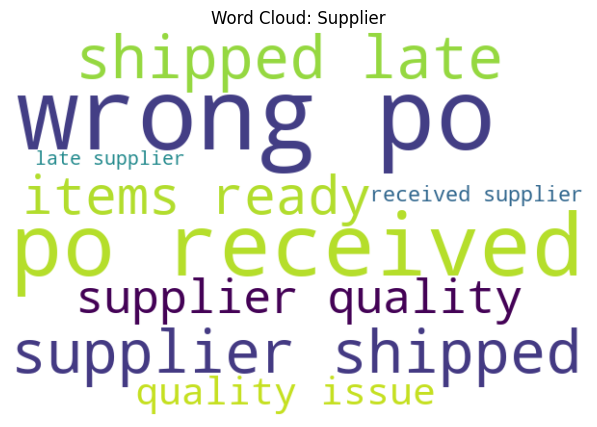

In [198]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for category in df['Category'].unique():
    text = ' '.join(df[df['Category'] == category]['Delay_Note_Clean'])
    wc = WordCloud(width=600, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud: {category}")
    plt.savefig(f'WordCloud_{category}.png')  # Save for your slides
    plt.show()

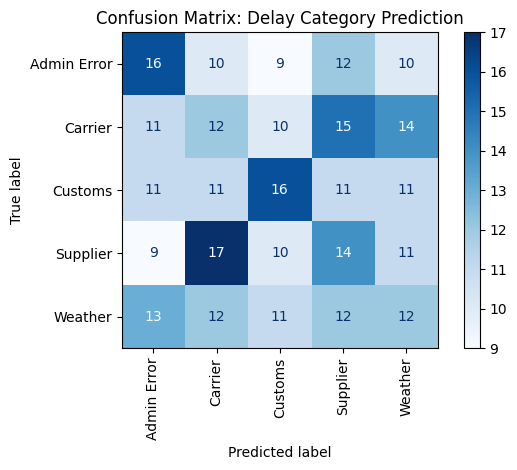

In [192]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model, X_test_tfidf, y_test, cmap='Blues', xticks_rotation='vertical'
)
plt.title('Confusion Matrix: Delay Category Prediction')
plt.tight_layout()
plt.savefig('Confusion_Matrix.png')  # Save for slides
plt.show()

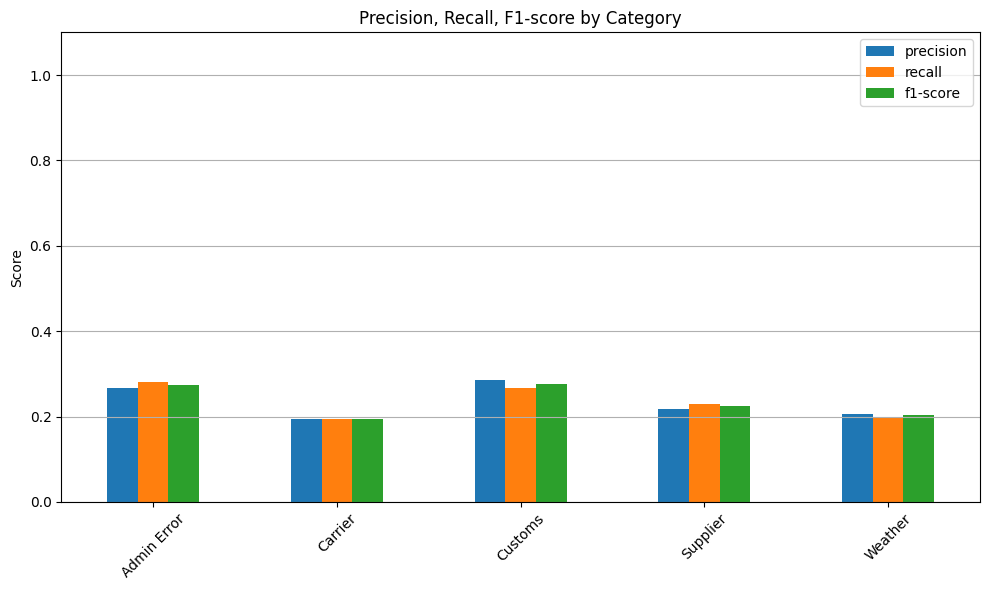

In [193]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().iloc[:-3, :3]  # only main categories

metrics_df.plot(kind='bar', figsize=(10,6))
plt.title('Precision, Recall, F1-score by Category')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Classification_Report_Bar.png')
plt.show()

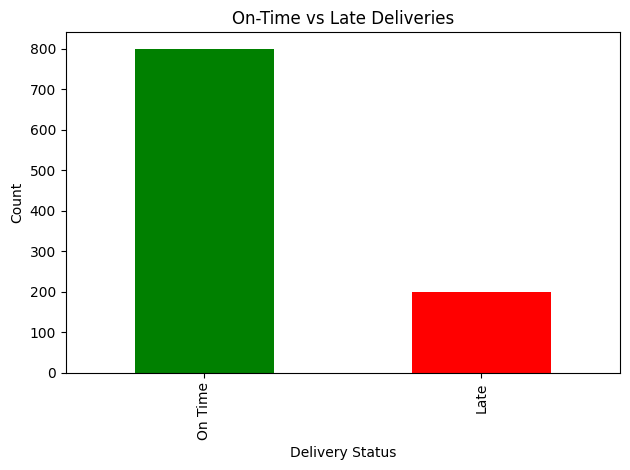

In [194]:
import numpy as np

# Simulate: 80% on-time, 20% late
np.random.seed(42)
df['OnTime'] = np.random.choice(['On Time', 'Late'], p=[0.8, 0.2], size=len(df))

df['OnTime'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('On-Time vs Late Deliveries')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('OnTime_vs_Late.png')
plt.show()